<a href="https://colab.research.google.com/github/ARYAA98/Smart_Location_Database_Analysis/blob/main/SmartLocation_Database_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Smart Location Database(SLD) from the U.S Environmental Protection agency and the US general Services Administration provides comprehensice data for analysing the location efficiency of different places in the United States. The database includes various demographic, employment and environment variables for every census Block Group(CBG).

##**Importing Necessary Libraries for the Analysis**

In [1]:
import pandas as pd               # for numerical and array operations
import numpy as np                # for data manipulation
import matplotlib.pyplot as plt   # for data visualization
%matplotlib inline
import seaborn as sns             # for data visualization
import plotly.express as px       # for data visualization

##**Loading the Dataset**

In [2]:
# reading the dataset using pandas
Smart_location_df=pd.read_csv("/content/drive/MyDrive/EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv")

In [3]:
#to view the top 10 values
Smart_location_df.head(10)

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,2.978361e+05
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,4.849451e+05
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,1.067059e+05
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,4.818284e+05
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,6.876848e+05
5,6,4.811300e+11,4.811300e+11,48,113,7827,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.189063,0.000467,0.135336,1,4,5,13,6.833333,3109.651786,2.051268e+05
6,7,4.811300e+11,4.811300e+11,48,113,9301,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.012107,0.000184,0.053166,1,1,10,13,8.000000,4345.799339,8.119811e+05
7,8,4.811300e+11,4.811300e+11,48,113,1102,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.375864,0.001031,0.298647,9,12,13,16,13.166667,2248.148479,2.589736e+05
8,9,4.811300e+11,4.811300e+11,48,113,11401,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.000030,0.000005,0.001318,3,2,11,18,10.500000,8246.622195,2.479375e+06
9,10,4.811300e+11,4.811300e+11,48,113,11401,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.000012,0.000006,0.001745,1,1,10,15,8.666667,3669.658355,7.574020e+05


##**Exploring the Dataset**

The dataset contains a 117 columns and 220740 rows.

In [4]:
# checking the column names
Smart_location_df.columns

Index(['OBJECTID', 'GEOID10', 'GEOID20', 'STATEFP', 'COUNTYFP', 'TRACTCE',
       'BLKGRPCE', 'CSA', 'CSA_Name', 'CBSA',
       ...
       'D5DRI', 'D5DE', 'D5DEI', 'D2A_Ranked', 'D2B_Ranked', 'D3B_Ranked',
       'D4A_Ranked', 'NatWalkInd', 'Shape_Length', 'Shape_Area'],
      dtype='object', length=117)

In [5]:
#to find the shape of the dataset
Smart_location_df.shape

(220740, 117)

In [6]:
# checking the datatypes and all the info about the dataset
Smart_location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220740 entries, 0 to 220739
Columns: 117 entries, OBJECTID to Shape_Area
dtypes: float64(73), int64(42), object(2)
memory usage: 197.0+ MB


In [7]:
#statistical info about the data
Smart_location_df.describe()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CBSA,CBSA_POP,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
count,220740.000000,2.207390e+05,2.207400e+05,220740.000000,220740.000000,220740.000000,220740.000000,167709.000000,203645.000000,2.207400e+05,...,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,2.207400e+05,2.207400e+05
mean,110370.500000,2.870894e+11,2.870915e+11,28.623190,85.697449,262342.382110,2.221392,341.742661,30514.836210,3.607329e+06,...,-57326.486630,-57326.597590,-57326.483325,10.500000,10.500000,10.500000,7.624884,9.541628,1.655970e+04,4.466074e+07
std,63722.293548,1.640746e+11,1.640774e+11,16.386075,98.818946,351403.837442,1.195155,125.700068,10979.471375,5.219925e+06,...,49459.959391,49459.830782,49459.963223,5.766294,5.766294,5.766294,7.812853,4.373952,3.830373e+04,6.430513e+08
min,1.000000,1.001020e+10,1.001020e+10,1.000000,1.000000,100.000000,0.000000,104.000000,10100.000000,0.000000e+00,...,-99999.000000,-99999.000000,-99999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.685713e+02,4.435890e+03
25%,55185.750000,1.312100e+11,1.312100e+11,13.000000,29.000000,10303.000000,1.000000,218.000000,19740.000000,2.053030e+05,...,-99999.000000,-99999.000000,-99999.000000,5.750000,5.750000,5.750000,1.000000,5.833333,3.271213e+03,4.985104e+05
50%,110370.500000,2.901900e+11,2.901900e+11,29.000000,61.000000,46298.000000,2.000000,361.000000,32820.000000,1.252890e+06,...,-99999.000000,-99999.000000,-99999.000000,10.500000,10.500000,10.500000,1.000000,9.166667,5.877323e+03,1.373918e+06
75%,165555.250000,4.200350e+11,4.200350e+11,42.000000,109.000000,482503.000000,3.000000,429.000000,39300.000000,4.673634e+06,...,0.142514,0.000354,0.161708,15.250000,15.250000,15.250000,16.000000,13.166667,1.596391e+04,9.413158e+06
max,220740.000000,7.803100e+11,7.803100e+11,78.000000,840.000000,993000.000000,9.000000,566.000000,49820.000000,1.931847e+07,...,1.000000,1.000000,1.000000,20.000000,20.000000,20.000000,20.000000,20.000000,3.925989e+06,1.641290e+11


In [8]:
#to check for any null value
print(Smart_location_df.isnull().sum())


OBJECTID        0
GEOID10         1
GEOID20         0
STATEFP         0
COUNTYFP        0
               ..
D3B_Ranked      0
D4A_Ranked      0
NatWalkInd      0
Shape_Length    0
Shape_Area      0
Length: 117, dtype: int64


In [9]:
#to find the percentage of data that is missing
pd.set_option("display.max_rows", None)                                  # to view all the rows
print((Smart_location_df.isnull().sum()/(len(Smart_location_df)))*100)
pd.reset_option("display.max_rows", None)                                # resetting after viewing all

OBJECTID         0.000000
GEOID10          0.000453
GEOID20          0.000000
STATEFP          0.000000
COUNTYFP         0.000000
TRACTCE          0.000000
BLKGRPCE         0.000000
CSA             24.024191
CSA_Name        24.024191
CBSA             7.744405
CBSA_Name        7.744405
CBSA_POP         0.000000
CBSA_EMP         0.000000
CBSA_WRK         0.000000
Ac_Total         0.000000
Ac_Water         0.000000
Ac_Land          0.000000
Ac_Unpr          0.000000
TotPop           0.000000
CountHU          0.124581
HH               0.124581
P_WrkAge         0.000000
AutoOwn0         0.000000
Pct_AO0          0.000000
AutoOwn1         0.000000
Pct_AO1          0.000000
AutoOwn2p        0.000000
Pct_AO2p         0.000000
Workers          0.000000
R_LowWageWk      0.000000
R_MedWageWk      0.000000
R_HiWageWk       0.000000
R_PCTLOWWAGE     0.000000
TotEmp           0.000000
E5_Ret           0.000000
E5_Off           0.000000
E5_Ind           0.000000
E5_Svc           0.000000
E5_Ent      

In [10]:
#to check for duplicates
duplicates = Smart_location_df[Smart_location_df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [OBJECTID, GEOID10, GEOID20, STATEFP, COUNTYFP, TRACTCE, BLKGRPCE, CSA, CSA_Name, CBSA, CBSA_Name, CBSA_POP, CBSA_EMP, CBSA_WRK, Ac_Total, Ac_Water, Ac_Land, Ac_Unpr, TotPop, CountHU, HH, P_WrkAge, AutoOwn0, Pct_AO0, AutoOwn1, Pct_AO1, AutoOwn2p, Pct_AO2p, Workers, R_LowWageWk, R_MedWageWk, R_HiWageWk, R_PCTLOWWAGE, TotEmp, E5_Ret, E5_Off, E5_Ind, E5_Svc, E5_Ent, E8_Ret, E8_off, E8_Ind, E8_Svc, E8_Ent, E8_Ed, E8_Hlth, E8_Pub, E_LowWageWk, E_MedWageWk, E_HiWageWk, E_PctLowWage, D1A, D1B, D1C, D1C5_RET, D1C5_OFF, D1C5_IND, D1C5_SVC, D1C5_ENT, D1C8_RET, D1C8_OFF, D1C8_IND, D1C8_SVC, D1C8_ENT, D1C8_ED, D1C8_HLTH, D1C8_PUB, D1D, D1_FLAG, D2A_JPHH, D2B_E5MIX, D2B_E5MIXA, D2B_E8MIX, D2B_E8MIXA, D2A_EPHHM, D2C_TRPMX1, D2C_TRPMX2, D2C_TRIPEQ, D2R_JOBPOP, D2R_WRKEMP, D2A_WRKEMP, D2C_WREMLX, D3A, D3AAO, D3AMM, D3APO, D3B, D3BAO, D3BMM3, D3BMM4, D3BPO3, D3BPO4, D4A, D4B025, D4B050, D4C, D4D, D4E, D5AR, D5AE, ...]
Index: []

[0 rows x 117 columns]


In [11]:
# to check for the  unique values in the dataset
pd.set_option("display.max_rows", None)
print(Smart_location_df.nunique())
pd.reset_option("display.max_rows", None)

OBJECTID        220740
GEOID10          43064
GEOID20          43062
STATEFP             56
COUNTYFP           329
TRACTCE          23969
BLKGRPCE            10
CSA                175
CSA_Name           175
CBSA               938
CBSA_Name          938
CBSA_POP           936
CBSA_EMP           921
CBSA_WRK           922
Ac_Total        215248
Ac_Water         83028
Ac_Land         214514
Ac_Unpr         218040
TotPop            6407
CountHU           3137
HH                2822
P_WrkAge           948
AutoOwn0           972
Pct_AO0          61053
AutoOwn1          1330
Pct_AO1          91604
AutoOwn2p         2135
Pct_AO2p        104283
Workers           3314
R_LowWageWk        993
R_MedWageWk       1342
R_HiWageWk        2048
R_PCTLOWWAGE     63997
TotEmp            7840
E5_Ret            2117
E5_Off            2998
E5_Ind            3830
E5_Svc            4810
E5_Ent            2102
E8_Ret            2117
E8_off            2563
E8_Ind            3830
E8_Svc            3043
E8_Ent     

# DATA CLEANING

In [12]:
#dropping the null values in the dataset
Smart_location_df=Smart_location_df.dropna()
Smart_location_df.shape                     # to check the shape of the dataset after removing null values

(167265, 117)

In [13]:
#to set the index to OBJECTID
Smart_location_df=Smart_location_df.set_index("OBJECTID")

# DATA VISUALIZATION

The Smart Land Database contains multiple domains of measures which are organized into five main areas.



1. **D1** : Includes metrics for factors like residential density, population density and various employment densities.
2.  **D2**  : Metrics for employment per house hold
3. **D3** : related to built environment like roads and streets intersection
4. **D4** : for the transit accessibiity
5. **D5** : for the Destination Accessibility

Walkability Index represents the composite measure by considering the different rankings from the database.





## **Various Land distributions**

Here  

1.   Ac_Total represents total geometric area (acres) of the CBG
2.   Ac_Water represents total water area (acres)
3.   Ac_Land  represents total land area (acres)
4.   Ac_Unpr represents total land area (acres) that is not protected from development (i.e., not a park, natural area or conservation area)



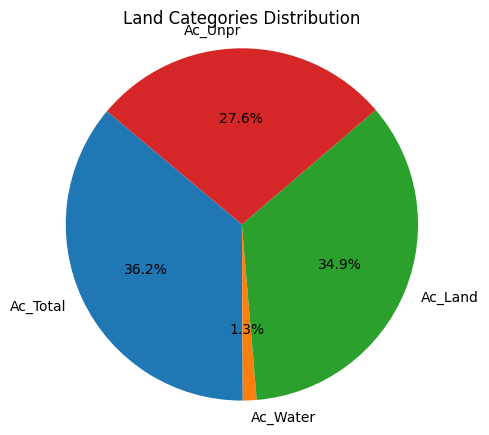

In [14]:
# Summarizing the data
Land_df = Smart_location_df[['Ac_Total', 'Ac_Water', 'Ac_Land','Ac_Unpr']].sum()

# for labelling the pie chart
labels=[ 'Ac_Total','Ac_Water', 'Ac_Land','Ac_Unpr']

# pie chart
plt.figure(figsize=(5,5))                                                       #figure size
plt.pie(Land_df.values, labels=labels, autopct='%1.1f%%', startangle=140)       #for plotting pie chart
plt.title('Land Categories Distribution')                                       #title of pie chart
plt.axis('equal')                                                               #to ensure pie chart is circle
plt.show()

**Population and Employment Density on Land**

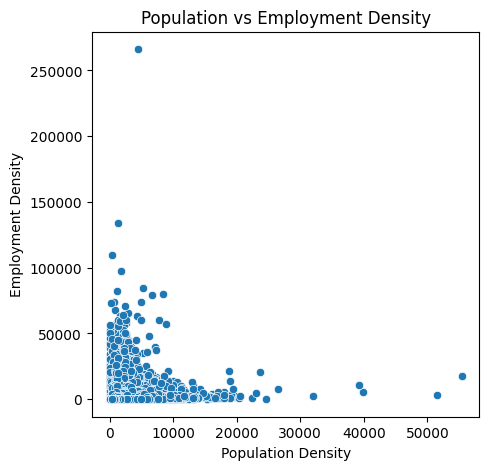

' Here TotPop represents the population in 2018 and \nTotEmp is the total employment in the year 2018'

In [15]:
# Population and Employment Density Plot
plt.figure(figsize=(5,5))
sns.scatterplot(x='TotPop', y='TotEmp', data=Smart_location_df)            # scatter plot
plt.xlabel('Population Density')
plt.ylabel('Employment Density')
plt.title('Population vs Employment Density')
plt.show()

''' Here TotPop represents the population in 2018 and
TotEmp is the total employment in the year 2018'''

OBSERVATIONS
1. Area with higher population density having higher employment Density- urban area
2. Most of point being concentrated towards bottom left indicating less employment density in most of the areas with low population density.
3. Presence of outliers

**Employment Density distribution in 5 tier scheme**

In [16]:
# Employment Density in 5 tier scheme

# Summarizing the data
employment_density_df = Smart_location_df[['TotEmp','E5_Ret', 'E5_Off', 'E5_Ind','E5_Svc','E5_Ent']].sum()

# Creating a bar plot
fig = px.bar(employment_density_df, x=employment_density_df.index, y=employment_density_df.values, title='Employment density distribution in 5 tier scheme')
fig.update_xaxes(title_text='Employment type')
fig.update_yaxes(title_text='Number ')
fig.show()

''' Here 'E5_Ret', 'E5_Off', 'E5_Ind','E5_Svc','E5_Ent' are the various fields of employment like the Retail,
office , industry, services and entertainment that are in the 5 tier scheme.'''

" Here 'E5_Ret', 'E5_Off', 'E5_Ind','E5_Svc','E5_Ent' are the various fields of employment like the Retail, \noffice , industry, services and entertainment that are in the 5 tier scheme."

**Employment Density distribution in 8 tier scheme**

In [17]:
# Employment Density in 8 tier

# Summarizing the data
employment_density_df2 = Smart_location_df[['E8_Ret', 'E8_off', 'E8_Ind','E8_Svc','E8_Ent','E8_Ed','E8_Hlth','E8_Pub']].sum()

# Creating a bar plot
fig = px.bar(employment_density_df2, x=employment_density_df2.index, y=employment_density_df2.values, title='Employment density distribution in 8 tier scheme')
fig.update_xaxes(title_text='Employment type')
fig.update_yaxes(title_text='Number of people working')
fig.show()

''' here 'E8_Ret', 'E8_off', 'E8_Ind','E8_Svc','E8_Ent','E8_Ed','E8_Hlth','E8_Pub' are the the various fields of employment like the Retail,
office , industry, services, entertainment , education , health and public service that are in the 8 th tier scheme.'''

" here 'E8_Ret', 'E8_off', 'E8_Ind','E8_Svc','E8_Ent','E8_Ed','E8_Hlth','E8_Pub' are the the various fields of employment like the Retail, \noffice , industry, services, entertainment , education , health and public service that are in the 8 th tier scheme."

**Automobile ownership Distribution**

1. AutoOwn0   :Number of households in CBG that own zero automobiles, 2018
2. AutoOwn1   :Number of households in CBG that own one automobile, 2018
3. AutoOwn2p  :Number of households in CBG that own two or more automobiles, 2018

In [ ]:
 #Bar plot of automobile ownership

# Summarizing the data
auto_ownership_df = Smart_location_df[['AutoOwn0', 'AutoOwn1', 'AutoOwn2p']].sum()

# Creating a bar plot
fig = px.bar(auto_ownership_df, x=auto_ownership_df.index, y=auto_ownership_df.values, title='Automobile Ownership Distribution')
fig.update_xaxes(title_text='Number of Automobiles Owned')
fig.update_yaxes(title_text='Number of Households')
fig.show()


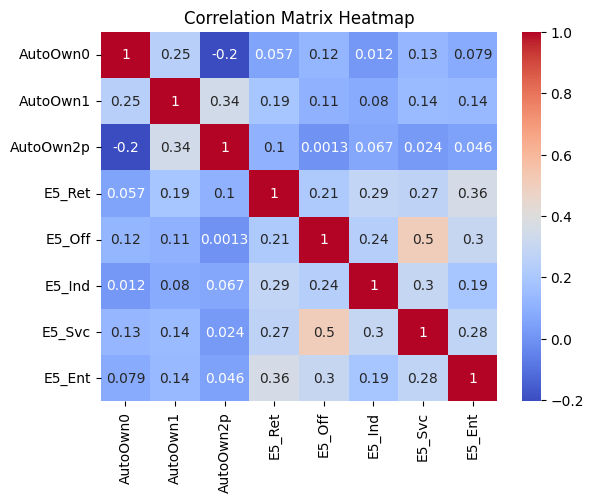

In [18]:
# Employment and automobile ownership analysis in 5 tier scheme
sns.heatmap(Smart_location_df[['AutoOwn0', 'AutoOwn1', 'AutoOwn2p','E5_Ret', 'E5_Off', 'E5_Ind','E5_Svc','E5_Ent']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

**ANALYSIS AND VISUALIZATION FOR D1**

1. D1A represents the Gross residential density (HU/acre) on unprotected land.
2. D1B represents the Gross population density (people/acre) on unprotected land.
3. D1C represents the Gross employment density (jobs/acre) on unprotected land.

In [14]:
# Selecting a few representative density measures from the D1 category
density_metrics = ['D1A', 'D1B', 'D1C']

# Summary statistics for the selected density metrics

density_stats = Smart_location_df[density_metrics].describe()
print(density_stats)


                 D1A            D1B            D1C
count  167265.000000  167265.000000  167265.000000
mean        5.456408      12.611255       4.531501
std        15.212606      32.437264      52.612810
min         0.000000       0.000000       0.000000
25%         0.700368       1.697182       0.145764
50%         2.390460       5.656828       0.741966
75%         4.844418      11.941264       2.629411
max      1481.257220    3133.578265   14032.760640


In [19]:
# Employment Density in unprotected land under 5 tier scheme

# Summarizing the data
employment_density_df = Smart_location_df[['D1C5_RET', 'D1C5_OFF', 'D1C5_IND','D1C5_SVC','D1C5_ENT']].sum()

# Creating a bar plot
fig = px.bar(employment_density_df, x=employment_density_df.index, y=employment_density_df.values, title='Employment density distribution in UNPROTECTED LAND under 5 tier scheme')
fig.update_xaxes(title_text='Employment type')
fig.update_yaxes(title_text='Number ')
fig.show()

''' 'D1C5_RET', 'D1C5_OFF', 'D1C5_IND','D1C5_SVC','D1C5_ENT' : gross employment density in the retail, office, industry
   service and  entertainment service under 5 tier scheme '''



" 'D1C5_RET', 'D1C5_OFF', 'D1C5_IND','D1C5_SVC','D1C5_ENT' : gross employment density in the retail, office, industry\n   service and  entertainment service under 5 tier scheme "

In [17]:
# Employment Density in unprotected land under 8 tier scheme

# Summarizing the data
employment_density_df = Smart_location_df[['D1C8_RET', 'D1C8_OFF', 'D1C8_IND','D1C8_SVC','D1C8_ENT','D1C8_ED','D1C8_HLTH','D1C8_PUB']].sum()

# Creating a bar plot
fig = px.bar(employment_density_df, x=employment_density_df.index, y=employment_density_df.values, title='Employment density distribution in UNPROTECTED LAND under 8 tier scheme')
fig.update_xaxes(title_text='Employment type')
fig.update_yaxes(title_text='Number ')
fig.show()

''' 'D1C8_RET', 'D1C8_OFF', 'D1C8_IND','D1C8_SVC','D1C8_ENT','D1C8_ED','D1C8_HLTH','D1C8_PUB' : gross employment density in the retail, office, industry
   service , entertainment, education, healthcare and public service under 8 tier scheme '''

" 'D1C8_RET', 'D1C8_OFF', 'D1C8_IND','D1C8_SVC','D1C8_ENT','D1C8_ED','D1C8_HLTH','D1C8_PUB' : gross employment density in the retail, office, industry\n   service , entertainment, education, healthcare and public service under 8 tier scheme "

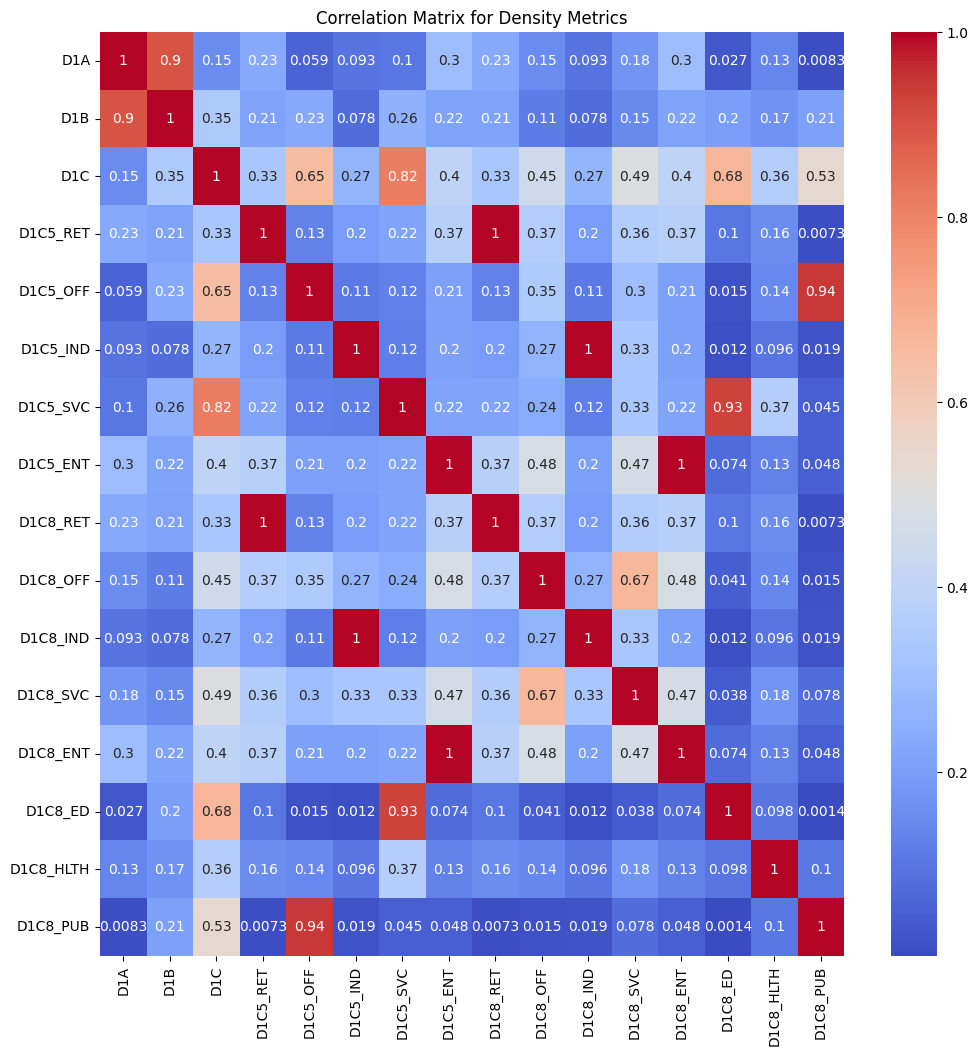

"---D1A, D1B , D1C :  represents the gross residential, population and employment density respectively.\n  ---D1C5_RET', 'D1C5_OFF', 'D1C5_IND','D1C5_SVC','D1C5_ENT   represents the gross employment density in the retail, office ,\n               industrial , service and entertainment under the 5 tier scheme\n--- 'D1C8_RET', 'D1C8_OFF', 'D1C8_IND','D1C8_SVC','D1C8_ENT','D1C8_ED','D1C8_HLTH','D1C8_PUB' represents the various gross employment density under the 8 tier scheme."

In [20]:
# Plotting the correlation matrix using Seaborn
plt.figure(figsize=(12,12))
sns.heatmap(Smart_location_df[['D1A', 'D1B', 'D1C','D1C5_RET', 'D1C5_OFF', 'D1C5_IND','D1C5_SVC','D1C5_ENT','D1C8_RET', 'D1C8_OFF', 'D1C8_IND','D1C8_SVC','D1C8_ENT','D1C8_ED','D1C8_HLTH','D1C8_PUB']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Density Metrics')
plt.show()
'''---D1A, D1B , D1C :  represents the gross residential, population and employment density respectively.
  ---D1C5_RET', 'D1C5_OFF', 'D1C5_IND','D1C5_SVC','D1C5_ENT   represents the gross employment density in the retail, office ,
               industrial , service and entertainment under the 5 tier scheme
--- 'D1C8_RET', 'D1C8_OFF', 'D1C8_IND','D1C8_SVC','D1C8_ENT','D1C8_ED','D1C8_HLTH','D1C8_PUB' represents the various gross employment density under the 8 tier scheme.'''




**t- test between the Population Density and Residential Density**

In [21]:
from scipy import stats

# Extracting the population density and residential density
population_density = Smart_location_df['D1B']
residential_density = Smart_location_df['D1A']

# Performing a t-test
t_stat, p_value = stats.ttest_ind(population_density, residential_density, nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 81.67481203906912, P-value: 0.0


# **ANALYSIS ON D2**

1. D2A_JPHH represents the Jobs per household.
2. D2B_E5MIX represents the 5-tier employment entropy (denominator set to observed employment types in the CBG).
3. D2B_E8MIX represents the 8-tier employment entropy (denominator set to observed employment types in the CBG).
4. D2A_EPHHM represents the Employment and household entropy.

In [22]:
# Selecting a few representative density measures from the D2 category
density_metricsD2 = ['D2A_JPHH', 'D2B_E5MIX', 'D2B_E8MIX','D2A_EPHHM']

# Summary statistics for the selected density metrics

density_stats = Smart_location_df[density_metricsD2].describe()
print(density_stats)

            D2A_JPHH      D2B_E5MIX      D2B_E8MIX      D2A_EPHHM
count  167265.000000  167265.000000  167265.000000  167265.000000
mean        1.898528       0.643090       0.675200       0.492919
std        42.161435       0.254464       0.233792       0.228254
min         0.000000       0.000000       0.000000       0.000000
25%         0.139019       0.522271       0.582421       0.319439
50%         0.385686       0.709703       0.738778       0.507178
75%         1.047393       0.829803       0.838759       0.671322
max     12325.666670       1.000000       1.000000       0.999997


In [23]:
# Employment Entropy Distributions under 8 tier and 5 tier scheme

# Summarizing the data
employment_density_df2 = Smart_location_df[[ 'D2B_E5MIX', 'D2B_E8MIX']].sum()

# Creating a bar plot
fig = px.bar(employment_density_df2, x=employment_density_df2.index, y=employment_density_df2.values, title=' Employment Entropy Distributions under 8 tier and 5 tier scheme')
fig.update_xaxes(title_text='Employments')
fig.update_yaxes(title_text='Number ')
fig.show()

In [24]:
# Employment Distributions

# Summarizing the data
employment_density_df3 = Smart_location_df[[ 'D2R_JOBPOP', 'D2R_WRKEMP','D2C_WREMLX']].sum()

# Creating a bar plot
fig = px.bar(employment_density_df3, x=employment_density_df3.index, y=employment_density_df3.values, title='')
fig.update_xaxes(title_text='Employments')
fig.update_yaxes(title_text='Number ')
fig.show()

1. Here 'D2R_JOBPOP' represents Regional Diversity( Standard calculation based on population and total employment)
2. Here 'D2R_WRKEMP' represents Household Workers per Job, as compared to the region
3. Here 'D2C_WREMLX' represents Household Workers per Job Equilibrium Index

**Analysis on D3-DESIGN**

In [20]:
# Summarizing the data
design_density_df = Smart_location_df[[ 'D3A', 'D3AAO','D3AMM','D3APO','D3B']].mean()

# Creating a bar plot
fig = px.bar(design_density_df, x=design_density_df.index, y=design_density_df.values, title='')
fig.update_xaxes(title_text='Design')
fig.update_yaxes(title_text='Number ')
fig.show()

''' Here
1. D3A represents Total road network density
2. D3AAO represents Network density in terms of facility miles of auto-oriented links per square mile
3. D3AMM represents Network density in terms of facility miles of multi-modal links per square mile
4. D3APO represents Network density in terms of facility miles of pedestrian-oriented links per square mile
5. D3B represents Street intersection density'''

' Here \n1. D3A represents Total road network density\n2. D3AAO represents \n3. D3AMM represents \n4. D3APO represents\n5. D3B represents'

**Analysis on D4- TRANSIT ACCESS**

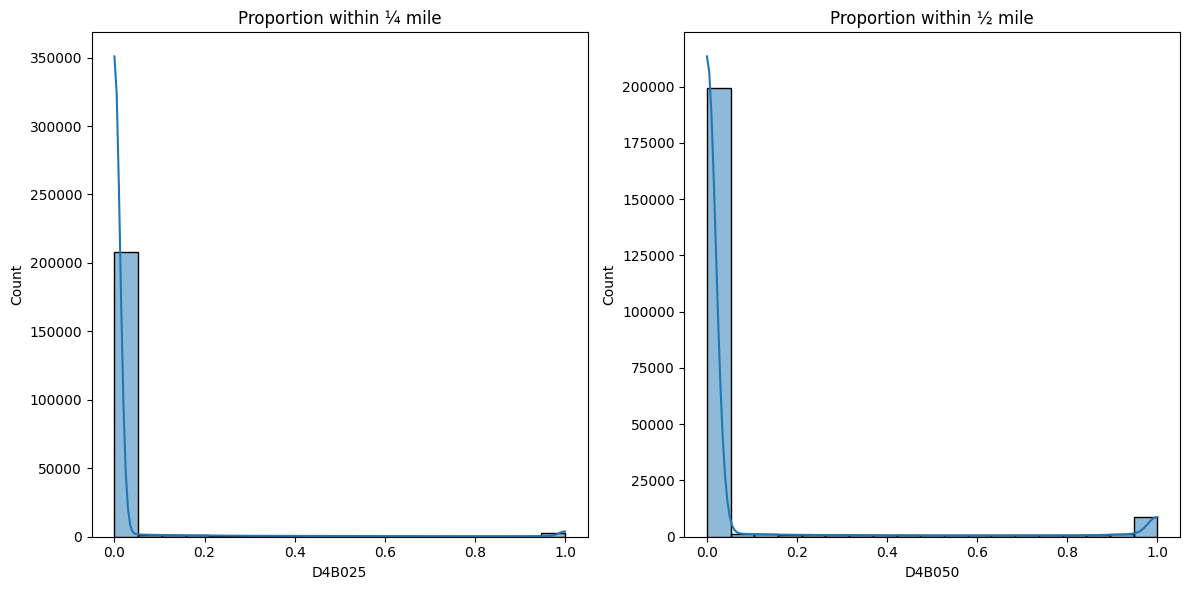

' here D4B025 represents Proportion of CBG employment within ¼ mile of fixedguideway transit stop \nand D4B050 represents Proportion of CBG employment within ½ mile of fixedguideway transit stop '

In [26]:
# comparing the proportion of CBG employment withing half mile and quarter mile of fixed guideway transit stop

plt.figure(figsize=(12, 6))                                  # plot size

plt.subplot(1, 2, 1)
sns.histplot(Smart_location_df['D4B025'], kde=True)
plt.title('Proportion within ¼ mile')

plt.subplot(1, 2, 2)
sns.histplot(Smart_location_df['D4B050'], kde=True)
plt.title('Proportion within ½ mile')

plt.tight_layout()
plt.show()

''' here D4B025 represents Proportion of CBG employment within ¼ mile of fixedguideway transit stop
and D4B050 represents Proportion of CBG employment within ½ mile of fixedguideway transit stop '''

**Analysis on D5 :Destination Accessibility**

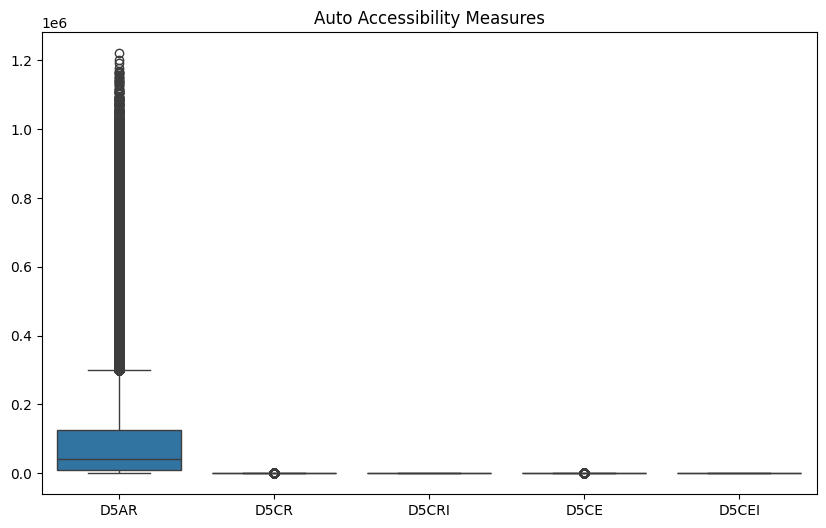

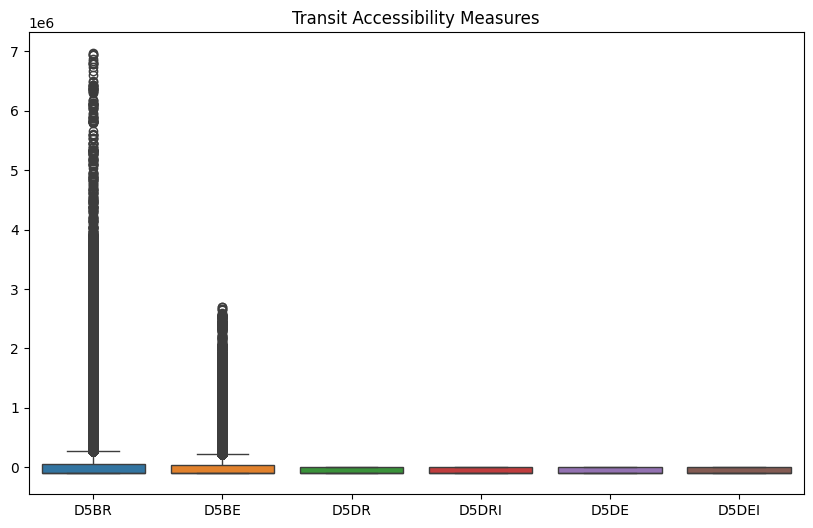

In [33]:
# Boxplots for auto vs. transit accessibility measures
auto_columns= ['D5AR', 'D5CR', 'D5CRI', 'D5CE', 'D5CEI']
transit_columns= ['D5BR', 'D5BE', 'D5DR', 'D5DRI', 'D5DE', 'D5DEI']

plt.figure(figsize=(10, 6))
sns.boxplot(data=Smart_location_df[auto_columns])
plt.title('Auto Accessibility Measures')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=Smart_location_df[transit_columns])
plt.title('Transit Accessibility Measures')
plt.show()

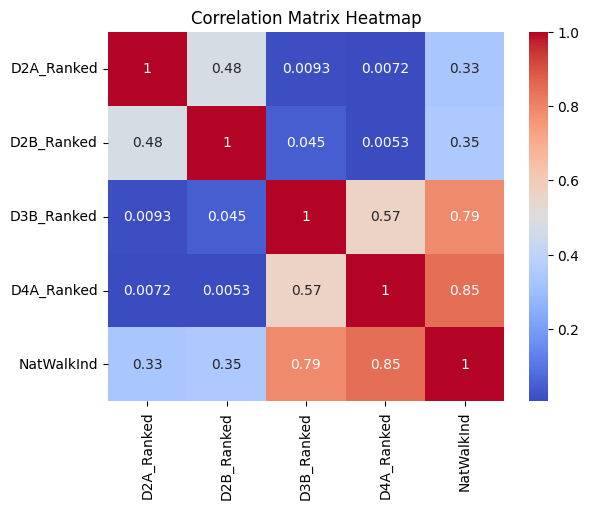

In [31]:
# Heatmap of Walkability Index
sns.heatmap(Smart_location_df[['D2A_Ranked', 'D2B_Ranked', 'D3B_Ranked', 'D4A_Ranked','NatWalkInd']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

'''Here
1. D2A_Ranked represents Quantile ranked order of Diversity
2. D2B_Ranked reprsents quantile ranked order of employment diversity of 8 tier employment
3. D3B_Ranked represents quantile ranked order of steet intersection density
4. D4A_Ranked represents quantile ranked order of Distance from the population-weighted centroid to nearest
5. NatWalkInd represents Distance from the population-weighted centroid to nearest